<a href="https://colab.research.google.com/github/CharlyPierce/Basico/blob/main/p_valor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
x=1.5+2.5*np.random.randn(100)
res=0+0.8*np.random.randn(100)
y_pred=5+1.9*x
y_act=5+1.9*x+res

In [ ]:
ds=pd.DataFrame({'x':x,'y':y_act,'y_pred':y_pred})
ds.head(1)

,x,y,y_pred
0,1.352885,7.975216,7.570482


In [ ]:
y_mean=[np.mean(y_act) for i in range(1,len(x)+1)]#n promedios
x_mean=[np.mean(y_act) for i in range(1,len(x)+1)]

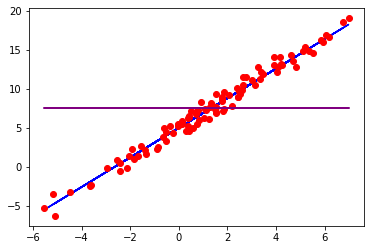

In [ ]:
plt.plot(x,y_pred,'blue')
plt.plot(x,y_act,'ro')
plt.plot(x,y_mean,'purple')

In [ ]:
ds['SSR']=(ds['y_pred']-y_act.mean())**2
ds['SSD']=(ds['y_pred']-ds['y'])**2
ds['SST']=(ds['y']-y_act.mean())**2
SSR=sum(ds['SSR'])
SSD=sum(ds['SSD'])#los que no se pueden explicar con modelo
SST=sum(ds['SST'])

In [ ]:
#R^2 para saber que tanto se relacionan los datos
R=SSR/SST
SST=SSR+SSD

(array([ 6.,  5.,  8., 20., 18., 10., 12.,  8.,  9.,  4.]),
 array([-1.66523863, -1.33846985, -1.01170107, -0.68493228, -0.3581635 ,
        -0.03139472,  0.29537407,  0.62214285,  0.94891163,  1.27568042,
         1.6024492 ]),
 <a list of 10 Patch objects>)

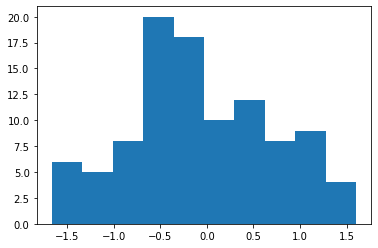

In [ ]:
plt.hist(ds['y_pred']-ds['y'])

In [ ]:
ds.head(1)

,x,y,y_pred,SSR,SSD,SST
0,1.352885,7.975216,7.570482,0.006435,0.163809,0.235178


In [ ]:
#Calcular Regrasion Lineal
#y=a+bx
#b=cov/var
#b=sum(xi-x_m)*(yi-y_m)/sum(xi-x_m)^2
#a=y_m-b*x_m

In [ ]:
x_m,y_m=ds['x'].mean(),ds['y'].mean()

In [ ]:
ds['cov_n']=(ds['x']-x_m)*(ds['y']-y_m)#covarianza
ds['var_n']=(ds['x']-x_m)**2#varianza

In [ ]:
b=ds['cov_n'].sum()/ds['var_n'].sum()
a=y_m-b*x_m
a,b#y=a+bx

(5.033916019531608, 1.9302796798584168)

In [ ]:
ds['model']=a+b*ds['x']#modelo calculado

In [ ]:
SSR1=sum((ds['model']-y_m)**2)
SSD1=sum((ds['model']-ds['y'])**2)
SST1=sum((ds['y']-y_m)**2)

In [ ]:
SSR1,SSD1,SST1

(2742.842174543605, 58.35880913120891, 2801.2009836748157)

In [ ]:
RR=SSR/SST
R,RR

(0.9488750795207253, 0.9780836963948957)

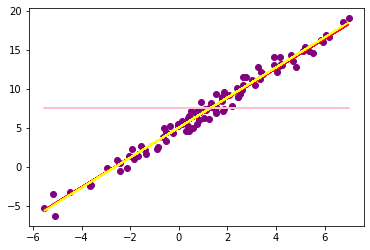

In [ ]:
plt.plot(x,y_pred,'red')#modelo 1
plt.scatter(x,y_act,c='purple')#puntos
plt.plot(ds['x'],ds['model'],'yellow')#modelo 2
plt.plot(x,y_mean,'pink')#media

In [ ]:
#Calcular Regrasion Lineal
#y=a+bx
#b=cov/var
#b=sum(xi-x_m)*(yi-y_m)/sum(xi-x_m)^2
#a=y_m-b*x_m
#nosotros calculamos a y b estos son estadisticos 'estimadores'
#que pueden o no ser significativos, para verificar esto
#usamos contraste de hipotesis para validar la significatividad
#de cada uno, debemos decidir si b  es o no cero
#H0:b=0 H1:b=!0, si el p-valor es menor que el nivel de
#significacion, rechazamos H0 y aceptamos H1 esto quiere
#decir que existe relacion lineal entre x e y

In [ ]:
#para Regresion multiple se ocupa el estadistico de Fhiser
#Tenemos tambien que verificar si el grupo de todas las
#variables predictoras son significativa o no, haciendo de nuevo
#un contraste de hipotesis donde  
#H0: B1=B2=...=Bk=0  H1:Bi=!0 para algun i
#F=(SSR/k)/(SSD/n-k-1) calculado esto nos fijamos en el p valor de F
#p=P(F>Fk,n-k-1)
#si este p-valor es mas pequeño que el nivel de significa rechazamos
#H0
#SST=sum((y-y_m)**2)  SSR=sum((y_pred-y_M)**2)  SSD=sum((y-y_pred)**2)
#n=No de filas del dataset o muestra
#k=No de variables predictoras 

In [ ]:
#en regresion multiple
#los p-valores puden cambiar en presencia de otros p-valores
#el estadistico F nos muestra una forma parcial del cambio
#del p-valor-global al añadir una nueva variable al modelo

In [ ]:
#al tener muchas variables el el p-valor del 
#estadistivo f puede verse muy 
#grande sumando pequeños valores esto llevaria a aceptar la hip
#de que no hay relacion, cuando si puede haberla
#Por otro lado si los miramos individualmente y vemos p-valores
#muy pequeños asumiriamos que hay una relacion con cada variable
#pero al a todas juntas no exite tal relacion

In [ ]:
#Lasuma de los cuadrados del los residuos RSE
#RSE es la estimacion de la desviacion estandar del termino del error
#(desv de la parte de datos que el modelo no es capaz de
#explicar por falta de informacion o más datos adicionales)
#RSE=sqrt(sum((y-y_pred)**2/(n-2))=sqrt(SSD/n-2) para RL simple
#RSE=sqrt(SSD/n-k-1)    para RL multiple

In [ ]:
#error estandar
RSE=np.sqrt(SSD/(len(ds)-2))
RSE1=np.sqrt(SSD1/(len(ds)-2))
RSE,RSE1#entre menor sea e mejor
#es la desviacion tipica del error

(0.7795774384401957, 0.7716852028899314)

In [ ]:
#para llevarlo a porcentaje div entrela media
RSE/y_m , RSE1/y_m#se observa un incremento entorno al 14 %
#del error

(0.10407877120079381, 0.10302510528180282)